<a href="https://colab.research.google.com/github/dsabdulla/nlp_tutorials/blob/main/NLP_roadmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP

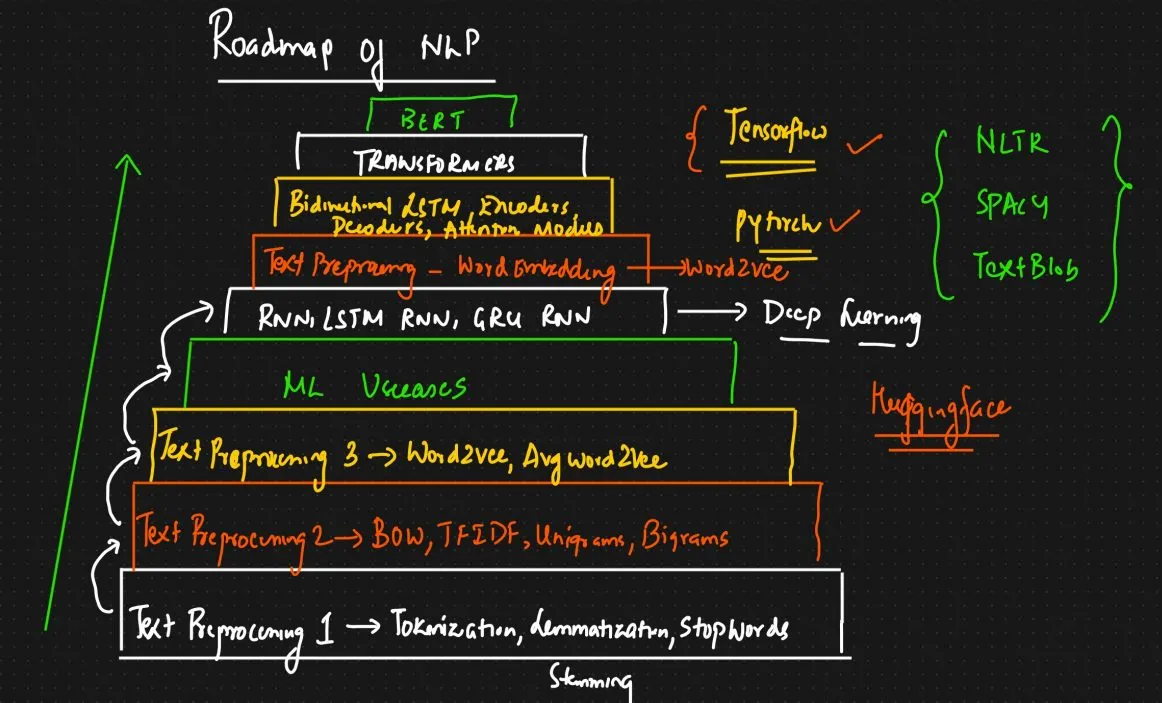

In [2]:
import nltk
import spacy

## PIPELINE NLP

1. Data acquisition
2. Text cleaning
3. Pre-processing
4. Feature engineering
5. Modeling
6. Evaluation
7. Deployment
8. Monitoring and model updating

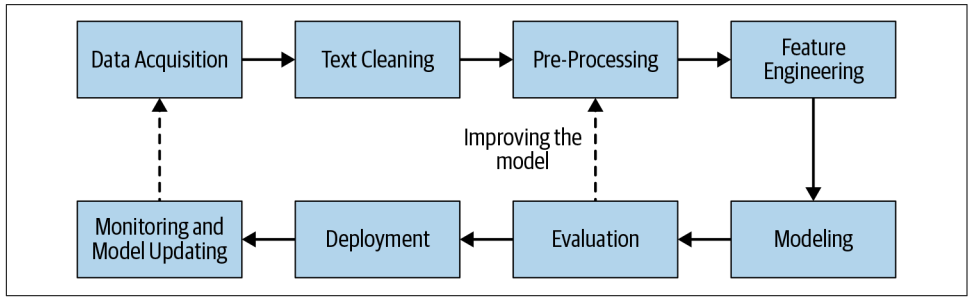

### Pre-processing (level 1)

#### Sentence segmentation
`Sentence segmentation` is the process of determining the longer processing units consisting of one or more words. This task involves identifying sentence boundaries between words in different sentences.

In [ ]:
nltk.download('punkt')

In [20]:
from nltk.tokenize import sent_tokenize

sents = sent_tokenize("Dr. Abdulla loves plov of Tashkent. Ali loves kebab of Gijduvan.")
for sent in sents:
  print(sent)

Dr. Abdulla loves plov of Tashkent.
Ali loves kebab of Gijduvan.


#### Word tokenization
`Word tokenization` is the process of splitting a large sample of text into words. This is a requirement in natural language processing tasks where each word needs to be captured and subjected to further analysis like classifying and counting them for a particular sentiment etc.

In [21]:
from nltk.tokenize import word_tokenize

words = word_tokenize("Dr. Abdulla loves plov of Tashkent. Ali loves kebab of Gijduvan.")
for word in words:
  print(word)

Dr.
Abdulla
loves
plov
of
Tashkent
.
Ali
loves
kebab
of
Gijduvan
.


#### Stemming and Lemmatization
`Stemming` refers to the process of removing suffixes and reducing a word to some base form such that all different variants of that word can be represented by the sameform (e.g., “car” and “cars” are both reduced to “car”).

`Lemmatization` is the process of mapping all the different forms of a word to its base word, or lemma. While this seems close to the definition of stemming, they are, in fact, different. For example, the adjective “better,” when stemmed, remains the same. However, upon lemmatization, this should become “good,” as shown in figure Lemmatization requires more linguistic knowledge, and modeling and developing efficient lemmatizers remains an open problem in NLP research even now.

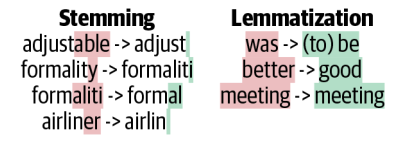

In [3]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
words = ["eating", 'eats', 'eat', 'ate', 'adjustable', "rafting", "ability", 'meeting']

for word in words:
  print(word, "|", stemmer.stem(word))

eating | eat
eats | eat
eat | eat
ate | ate
adjustable | adjust
rafting | raft
ability | abil
meeting | meet


In [5]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("eating eats eat ate adjustable rafting ability meeting better")
for token in doc:
  print(token, "|", token.lemma_)

eating | eat
eats | eat
eat | eat
ate | eat
adjustable | adjustable
rafting | raft
ability | ability
meeting | meeting
better | well


#### STOP WORDS

In [23]:
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load("en_core_web_sm")
doc = nlp("We just opened our wings, the flying part is coming soon")

for token in doc:
  if token.is_stop:
    print(token)

We
just
our
the
part
is


In [24]:
def preprocess(text):
  doc = nlp(text)

  no_stop_words = [token.text for token in doc if not token.is_stop and not token.is_punct]
  return no_stop_words

preprocess("Musk wants time to prepare for a trial over his")

['Musk', 'wants', 'time', 'prepare', 'trial']

#### Part Of Speech (POS)
`Part-of-speech` (POS) tagging is the process of labeling words in a text with their corresponding parts of speech in natural language processing (NLP). It helps algorithms understand the grammatical structure and meaning of a text

In [25]:
doc = nlp("Wow! Dr. Strange made 265 million $ on the very first day")

for token in doc:
  print(token, "|", token.pos_, "|", spacy.explain(token.pos_),
        "|", token.tag_, "|", spacy.explain(token.tag_))

Wow | INTJ | interjection | UH | interjection
! | PUNCT | punctuation | . | punctuation mark, sentence closer
Dr. | PROPN | proper noun | NNP | noun, proper singular
Strange | PROPN | proper noun | NNP | noun, proper singular
made | VERB | verb | VBD | verb, past tense
265 | NUM | numeral | CD | cardinal number
million | NUM | numeral | CD | cardinal number
$ | NUM | numeral | CD | cardinal number
on | ADP | adposition | IN | conjunction, subordinating or preposition
the | DET | determiner | DT | determiner
very | ADV | adverb | RB | adverb
first | ADJ | adjective | JJ | adjective (English), other noun-modifier (Chinese)
day | NOUN | noun | NN | noun, singular or mass


In [26]:
doc = nlp("He quits the job")
doc2 = nlp("He quit the job")
print(doc[1].text, "|", doc[1].tag_, "|", spacy.explain(doc[1].tag_))
print(doc2[1].text, "|", doc2[1].tag_, "|", spacy.explain(doc2[1].tag_))

quits | VBZ | verb, 3rd person singular present
quit | VBD | verb, past tense


### Pre-porcessing (level 2)

#### Named Entity Recognition (NER)
`NER` involves detecting and categorizing important information in text known as named entities. Named entities refer to the key subjects of a piece of text, such as names, locations, companies, events and products, as well as themes, topics, times, monetary values and percentages.

In [28]:
doc = nlp("Tesla Inc is going to acquire Twitter Inc for $45 billion")

for ent in doc.ents:
  print(ent.text, "|", ent.label_, "|", spacy.explain(ent.label_))

Tesla Inc | ORG | Companies, agencies, institutions, etc.
Twitter Inc | ORG | Companies, agencies, institutions, etc.
$45 billion | MONEY | Monetary values, including unit


In [29]:
from spacy import displacy

displacy.render(doc, style='ent', jupyter=True, options={'distance': 90})

#### Term frequency Inverse Document Frequency (TFIDF)

In [31]:
corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes",
    "something is amazing",
]

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
transformed_output = v.fit_transform(corpus)
print(v.vocabulary_)

{'thor': 27, 'eating': 11, 'pizza': 23, 'loki': 18, 'is': 17, 'ironman': 16, 'ate': 8, 'already': 0, 'apple': 6, 'announcing': 5, 'new': 21, 'iphone': 15, 'tomorrow': 28, 'tesla': 26, 'model': 20, 'google': 13, 'pixel': 22, 'microsoft': 19, 'surface': 25, 'amazon': 3, 'eco': 12, 'dot': 10, 'am': 1, 'biryani': 9, 'and': 4, 'you': 29, 'are': 7, 'grapes': 14, 'something': 24, 'amazing': 2}


In [33]:
all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
  indx = v.vocabulary_.get(word)
  print(f"{word} {v.idf_[indx]}")

already 2.504077396776274
am 2.504077396776274
amazing 2.504077396776274
amazon 2.504077396776274
and 2.504077396776274
announcing 1.4054651081081644
apple 2.504077396776274
are 2.504077396776274
ate 2.504077396776274
biryani 2.504077396776274
dot 2.504077396776274
eating 2.09861228866811
eco 2.504077396776274
google 2.504077396776274
grapes 2.504077396776274
iphone 2.504077396776274
ironman 2.504077396776274
is 1.1177830356563834
loki 2.504077396776274
microsoft 2.504077396776274
model 2.504077396776274
new 1.4054651081081644
pixel 2.504077396776274
pizza 2.504077396776274
something 2.504077396776274
surface 2.504077396776274
tesla 2.504077396776274
thor 2.504077396776274
tomorrow 1.4054651081081644
you 2.504077396776274


#### Bag Of n-grams

Unigram

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
v.fit(["Elon Musk is looking for a job"])
v.vocabulary_

{'elon': 0, 'musk': 5, 'is': 2, 'looking': 4, 'for': 1, 'job': 3}

2 grams (Bigram)

In [36]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(["Elon Musk is looking for a job"])
v.vocabulary_

{'elon': 0,
 'musk': 9,
 'is': 4,
 'looking': 7,
 'for': 2,
 'job': 6,
 'elon musk': 1,
 'musk is': 10,
 'is looking': 5,
 'looking for': 8,
 'for job': 3}

3 grams

In [37]:
v = CountVectorizer(ngram_range=(1,3))
v.fit(["Elon Musk is looking for a job"])
v.vocabulary_

{'elon': 0,
 'musk': 12,
 'is': 5,
 'looking': 9,
 'for': 3,
 'job': 8,
 'elon musk': 1,
 'musk is': 13,
 'is looking': 6,
 'looking for': 10,
 'for job': 4,
 'elon musk is': 2,
 'musk is looking': 14,
 'is looking for': 7,
 'looking for job': 11}

### Pre-porcessing (level 3)

#### Word2vec